In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Importing the Dataset

The original CSV file does not include any kind of column names, so if we don't define them, the first observation will be taken as the column names. We use the information provided to create the names of the features, and we will use one-word names for each of them for easy access.

In [2]:
columns = ['CustID', 'Accept1', 'Reward', 'Mailer', 'Income1', 'Accounts', 'Protection', 'Rating1', 'Cards', 'Homes', 'HHSize', 'HomeOwner', 'AvgBal', 'BalQ1', 'BalQ2', 'BalQ3', 'BalQ4']
data = pd.read_csv('creditcardmarketing.csv', names=columns)

### Dataset

The data set consists of information on 18,000 current bank customers in the study. These are the definitions of data points provided:

* CustID: A sequential number assigned to the customers (this column is hidden and excluded – this unique identifier will not be used directly).
* Accept: Did the customer accept (Yes) or reject (No) the offer. 
* Reward: The type of reward program offered for the card.
* Mailer: Letter or postcard.
* Income: Low, Medium or High.
* Accounts: How many non-credit-card accounts are held by the customer.
* Protection: Does the customer have overdraft protection on their checking account(s) (Yes or No).
* Rating: Credit Rating - Low, Medium or High.
* Cards: The number of credit cards held at the bank.
* Homes: The number of homes owned by the customer.
* HHSize: Number of individuals in the family.
* HomeOwner: Does the customer own their home? (Yes or No).
* BalQ_: Average account balance (across all accounts over time) for Q1, Q2, Q3 and Q4.
* AvgBal: Average balance for each quarter in the last year.

In [3]:
data.head()

,CustID,Accept1,Reward,Mailer,Income1,Accounts,Protection,Rating1,Cards,Homes,HHSize,HomeOwner,AvgBal,BalQ1,BalQ2,BalQ3,BalQ4
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [72]:
data['AvgBalCat'] = np.where(data['AvgBal'] < 787.5, 'A', np.where(data['AvgBal'] < 1007, 'B', np.where(data['AvgBal'] < 1153.25, 'C', 'D')))
data

,Accept1,Reward,Mailer,Income1,Accounts,Protection,Rating1,Cards,Homes,HHSize,...,BalQ4,AvgBalCat,LiveAlone,LowBalance,Income,Rating,Accept,Letter,AirMiles,Points
0,No,Air Miles,Letter,High,1,No,High,2,1,4,...,1002.0,D,0,0,3,3,0,1,1,0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,...,366.0,A,0,1,2,2,0,1,1,0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,...,242.0,A,0,1,3,2,0,0,1,0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,...,419.0,D,0,0,2,3,0,1,1,0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,...,365.0,D,0,0,2,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,No,Cash Back,Letter,High,1,No,Low,1,1,5,...,398.0,A,0,1,3,1,0,1,0,0
17972,No,Cash Back,Letter,High,1,No,Low,3,1,3,...,535.0,B,0,0,3,1,0,1,0,0
17973,No,Cash Back,Letter,High,1,No,Low,2,1,4,...,1494.0,C,0,0,3,1,0,1,0,0
17974,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,...,1615.0,C,0,0,2,2,0,1,0,0


In [73]:
data.to_csv('Data2.csv', index = False)

### Resetting Index, Dropping columns and NA values

First, we check for NA values, and as we see there are not many of them, we decide to drop them from the dataset, as they represent around 0.15% of all the observations, which is not a big deal.
After that, we reset the index to avoid having gaps after dropping some observations.
Finally, we will drop the CustID variable which we are not going to use, and as we are resetting the index, we will drop the older one. 

In [5]:
data.dropna(0, 'any', inplace = True)

In [6]:
data.reset_index(inplace = True)

In [7]:
data.drop(['CustID', 'index'], axis = 1, inplace = True)

Our dataset will contain a total of 17976 observations and 15 features apart from our label.

In [9]:
data

,Accept1,Reward,Mailer,Income1,Accounts,Protection,Rating1,Cards,Homes,HHSize,HomeOwner,AvgBal,BalQ1,BalQ2,BalQ3,BalQ4,AvgBalCat
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0,D
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,A
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0,A
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0,D
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0,A
17972,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0,B
17973,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0,C
17974,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0,C


In [10]:
data['Accept1'].value_counts()

No     16955
Yes     1021
Name: Accept1, dtype: int64

In [11]:
data['Reward'].value_counts()

Air Miles    6047
Cash Back    5995
Points       5934
Name: Reward, dtype: int64

In [12]:
data['Mailer'].value_counts()

Postcard    9134
Letter      8842
Name: Mailer, dtype: int64

In [13]:
data['Income1'].value_counts()

Medium    9002
High      4519
Low       4455
Name: Income1, dtype: int64

In [14]:
data['Accounts'].value_counts()

1    13674
2     4007
3      295
Name: Accounts, dtype: int64

In [15]:
data['Protection'].value_counts()

No     15300
Yes     2676
Name: Protection, dtype: int64

In [16]:
data['Rating1'].value_counts()

High      6064
Medium    5964
Low       5948
Name: Rating1, dtype: int64

In [17]:
data['Cards'].value_counts()

2    7933
1    6147
3    3381
4     515
Name: Cards, dtype: int64

In [18]:
data['Homes'].value_counts()

1    14502
2     3289
3      185
Name: Homes, dtype: int64

In [19]:
data['HomeOwner'].value_counts()

Yes    11636
No      6340
Name: HomeOwner, dtype: int64

In [20]:
data['HHSize'].value_counts()

3    5705
4    5532
5    2851
2    2809
1     539
6     538
9       1
8       1
Name: HHSize, dtype: int64

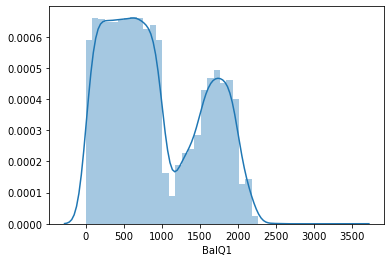

In [21]:
sns.distplot(data['BalQ1'])

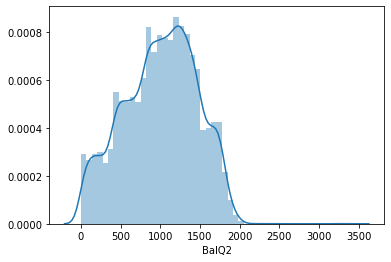

In [22]:
sns.distplot(data['BalQ2'])

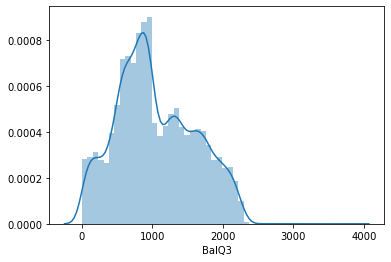

In [23]:
sns.distplot(data['BalQ3'])

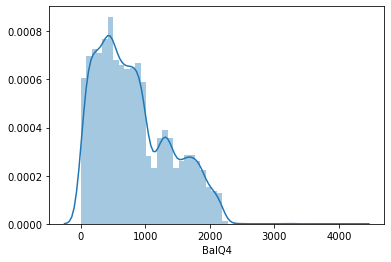

In [24]:
sns.distplot(data['BalQ4'])

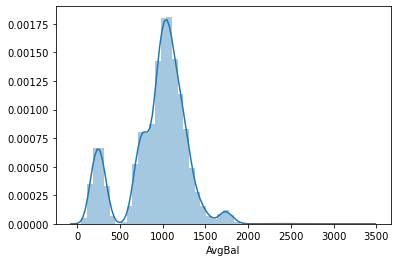

In [25]:
sns.distplot(data['AvgBal'])

In [26]:
data.describe()

,Accounts,Cards,Homes,HHSize,AvgBal,BalQ1,BalQ2,BalQ3,BalQ4
count,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,1.255730,1.903427,1.203549,3.499110,940.515562,910.450656,999.392190,1042.033600,810.185803
std,0.472405,0.797086,0.427446,1.114476,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [27]:
data.dtypes

Accept1        object
Reward         object
Mailer         object
Income1        object
Accounts        int64
Protection     object
Rating1        object
Cards           int64
Homes           int64
HHSize          int64
HomeOwner      object
AvgBal        float64
BalQ1         float64
BalQ2         float64
BalQ3         float64
BalQ4         float64
AvgBalCat      object
dtype: object

In [28]:
datanum = data.select_dtypes(include=np.float)

In [29]:
datanum

,AvgBal,BalQ1,BalQ2,BalQ3,BalQ4
0,1160.75,1669.0,877.0,1095.0,1002.0
1,147.25,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...
17971,167.50,136.0,65.0,71.0,398.0
17972,850.50,984.0,940.0,943.0,535.0
17973,1087.25,918.0,767.0,1170.0,1494.0
17974,1022.25,626.0,983.0,865.0,1615.0


In [30]:
datacat = data.select_dtypes(include=[np.int, np.object])

In [31]:
datacat

,Accept1,Reward,Mailer,Income1,Accounts,Protection,Rating1,Cards,Homes,HHSize,HomeOwner,AvgBalCat
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,D
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,A
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,A
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,D
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,D
...,...,...,...,...,...,...,...,...,...,...,...,...
17971,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,A
17972,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,B
17973,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,C
17974,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,C


In [32]:
accdf = data[data['Accept1'] == 'Yes']

In [33]:
accdf['Income1'].value_counts()

Medium    469
Low       387
High      165
Name: Income1, dtype: int64

In [34]:
accdf['HomeOwner'].value_counts()

Yes    661
No     360
Name: HomeOwner, dtype: int64

In [35]:
accdf['Rating1'].value_counts()

Low       633
Medium    269
High      119
Name: Rating1, dtype: int64

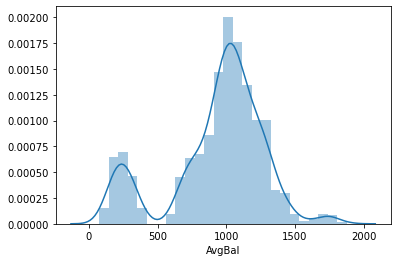

In [36]:
sns.distplot(accdf['AvgBal'])

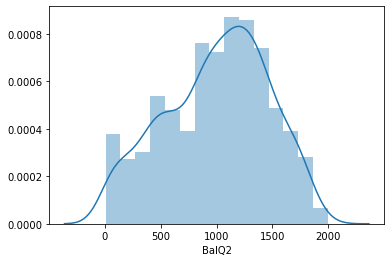

In [37]:
sns.distplot(accdf['BalQ2'])

In [38]:
data['LiveAlone'] = np.where(data['HHSize'] == 1, 1, 0)

In [39]:
data

,Accept1,Reward,Mailer,Income1,Accounts,Protection,Rating1,Cards,Homes,HHSize,HomeOwner,AvgBal,BalQ1,BalQ2,BalQ3,BalQ4,AvgBalCat,LiveAlone
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0,D,0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,A,0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0,A,0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0,D,0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0,A,0
17972,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0,B,0
17973,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0,C,0
17974,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0,C,0


In [40]:
data['LiveAlone'].value_counts()

0    17437
1      539
Name: LiveAlone, dtype: int64

In [74]:
data['LowBalance'] = np.where(data['AvgBal'] <= 500, 1, 0)
data['HighBalance'] = np.where(data['AvgBal'] >= 1000, 1, 0)

In [42]:
data

,Accept1,Reward,Mailer,Income1,Accounts,Protection,Rating1,Cards,Homes,HHSize,HomeOwner,AvgBal,BalQ1,BalQ2,BalQ3,BalQ4,AvgBalCat,LiveAlone,LowBalance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0,D,0,0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,A,0,1
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0,A,0,1
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0,D,0,0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0,D,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0,A,0,1
17972,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0,B,0,0
17973,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0,C,0,0
17974,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0,C,0,0


In [43]:
data['LowBalance'].value_counts()

0    15445
1     2531
Name: LowBalance, dtype: int64

In [44]:
data['Income'] = np.where(data['Income1'] == 'Low', 1, np.where(data['Income1'] == 'Medium', 2, 3))

In [45]:
data['Rating'] = np.where(data['Rating1'] == 'Low', 1, np.where(data['Rating1'] == 'Medium', 2, 3))

In [46]:
data['Accept'] = np.where(data['Accept1'] == 'Yes', 1, 0)

In [47]:
data['Letter'] = np.where(data['Mailer'] == 'Letter', 1, 0)

In [48]:
data['AirMiles'] = np.where(data['Reward'] == 'Air Miles', 1, 0)

In [49]:
data['Points'] = np.where(data['Reward'] == 'Points', 1, 0)

In [52]:
df = pd.DataFrame([data.Accept, data.AirMiles, data.Points, data.Letter, data.Income, data.Rating, data.LiveAlone, data.LowBalance, data.AvgBal]).transpose()

In [53]:
df = df.astype(int)

In [54]:
df['AvgBalCat'] = np.where(df['AvgBal'] < 787.5, 'A', np.where(df['AvgBal'] < 1007, 'B', np.where(df['AvgBal'] < 1153.25, 'C', 'D')))


In [55]:
df

,Accept,AirMiles,Points,Letter,Income,Rating,LiveAlone,LowBalance,AvgBal,AvgBalCat
0,0,1,0,1,3,3,0,0,1160,D
1,0,1,0,1,2,2,0,1,147,A
2,0,1,0,0,3,2,0,1,276,A
3,0,1,0,1,2,3,0,0,1219,D
4,0,1,0,1,2,2,0,0,1211,D
...,...,...,...,...,...,...,...,...,...,...
17971,0,0,0,1,3,1,0,1,167,A
17972,0,0,0,1,3,1,0,0,850,B
17973,0,0,0,1,3,1,0,0,1087,C
17974,0,0,0,1,2,2,0,0,1022,C


In [56]:
df.dtypes

Accept         int64
AirMiles       int64
Points         int64
Letter         int64
Income         int64
Rating         int64
LiveAlone      int64
LowBalance     int64
AvgBal         int64
AvgBalCat     object
dtype: object

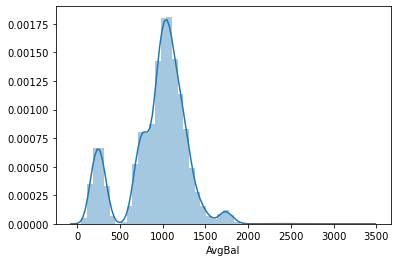

In [57]:
sns.distplot(data['AvgBal'])

In [58]:
df['AvgBal'] = np.log(data['AvgBal'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


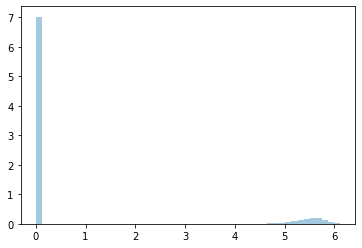

In [59]:
sns.distplot(df['AvgBal']*df['LowBalance'])

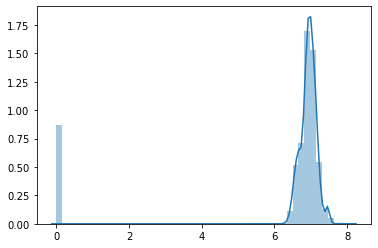

In [60]:
sns.distplot(df['AvgBal']*(1-df['LowBalance']))

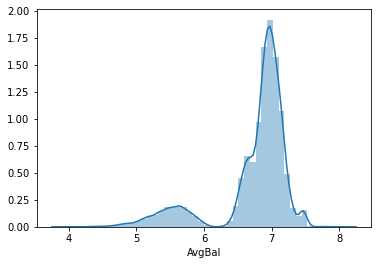

In [61]:
sns.distplot(df['AvgBal'])

In [62]:
y = df.iloc[:, 0]

In [63]:
X = df.iloc[:, 1:]

In [64]:
y

0        0
1        0
2        0
3        0
4        0
        ..
17971    0
17972    0
17973    0
17974    0
17975    0
Name: Accept, Length: 17976, dtype: int64

In [65]:
X

,AirMiles,Points,Letter,Income,Rating,LiveAlone,LowBalance,AvgBal,AvgBalCat
0,1,0,1,3,3,0,0,7.056822,D
1,1,0,1,2,2,0,1,4.992132,A
2,1,0,0,3,2,0,1,5.622211,A
3,1,0,1,2,3,0,0,7.105786,D
4,1,0,1,2,2,0,0,7.099202,D
...,...,...,...,...,...,...,...,...,...
17971,0,0,1,3,1,0,1,5.120983,A
17972,0,0,1,3,1,0,0,6.745824,B
17973,0,0,1,3,1,0,0,6.991407,C
17974,0,0,1,2,2,0,0,6.929761,C


In [66]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

We will first try the model with a ratio of 1:2 for the Yes:No samples.

In [67]:
undersample = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
X_und, y_und = undersample.fit_resample(X, y)

In [ ]:
print(Counter(y_und))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_und, y_und, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression(solver='liblinear', class_weight='balanced')

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
classification_report(y_test, y_pred, output_dict=True)['1']['precision']

In [ ]:
classification_report(y_test, y_pred, output_dict=True)['1']['recall']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
parameters = [{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

In [ ]:
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_accuracy = grid_search.best_score_

In [ ]:
best_params = grid_search.best_params_

In [ ]:
print('Best Accuracy: {:.2f}%'.format(best_accuracy * 100))

In [ ]:
print('Best Parameters: ', best_params)

We will try with other ratios, for example, 1:3.

In [ ]:
undersample = RandomUnderSampler(sampling_strategy=0.33)
X_und, y_und = undersample.fit_resample(X, y)
print(Counter(y_und))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_und, y_und, test_size=0.33, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
(965+78)/(965+78+256+59)

In [ ]:
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
print('Best Accuracy: {:.2f}%'.format(best_accuracy * 100))

In [ ]:
print('Best Parameters: ', best_params)

We will now use a 1:4 ratio.

In [ ]:
undersample = RandomUnderSampler(sampling_strategy=1)
X_und, y_und = undersample.fit_resample(X, y)
print(Counter(y_und))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_und, y_und, test_size=0.33, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
print('Best Accuracy: {:.2f}%'.format(best_accuracy * 100))

In [ ]:
print('Best Parameters: ', best_params)

In [75]:
for sam in [1, 0.9, 0.8, 0.66, 0.5, 0.4, 0.33, 0.25, 0.2]:
    for test in [0.2, 0.25, 0.3]:
        undersample = RandomUnderSampler(sampling_strategy=sam)
        X_und, y_und = undersample.fit_resample(X, y)
        X_train, X_test, y_train, y_test = train_test_split(X_und, y_und, test_size=test, random_state=42)
        classifier = LogisticRegression(solver='liblinear', class_weight='balanced')
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        confusion_matrix(y_test, y_pred)
        pre = classification_report(y_test, y_pred, output_dict=True)['1']['precision']*100
        acc = classification_report(y_test, y_pred, output_dict=True)['1']['recall']*100
        print(f'Log model with a {sam:.2f} ratio, test size of {test:.2f}: {acc:.2f}% of sensitivity and a {pre:.2f}% of precision.')

NameError: name 'train_test_split' is not defined